### Mask Edges examples

Sometimes, when calculating the **Difference Image** between _**Out of Transit**_ and _**In Transit**_ times we see bright pixels in one of the image edges that normaly are unrelated to our analysis, as they have a separation greater the 100 arseconds to the target. 

In such cases (and only in those cases)  a warning is thrown and we can recall centroid_vetting() with the parameter **mask_edges=True** or **mask=\<custom_mask>** to allow the centroid calculation in the Central region of the target pixel file.
Below are 2 examples of it

In [5]:
#
import numpy as np
import lightkurve as lk
#
from tesscentroidvetting import centroid_vetting
#

Brightest pixel on edge. Flux centroid couldn't be calculated. Use mask_edges=True or supply a mask if suitable.


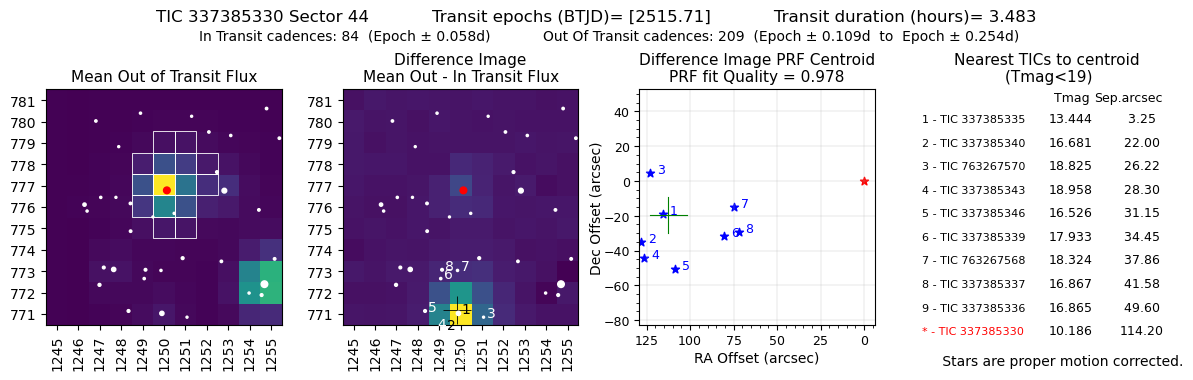

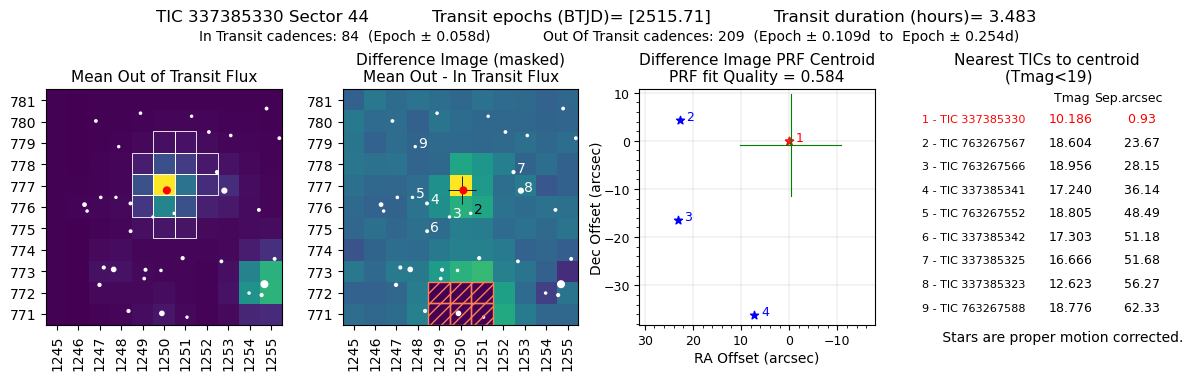

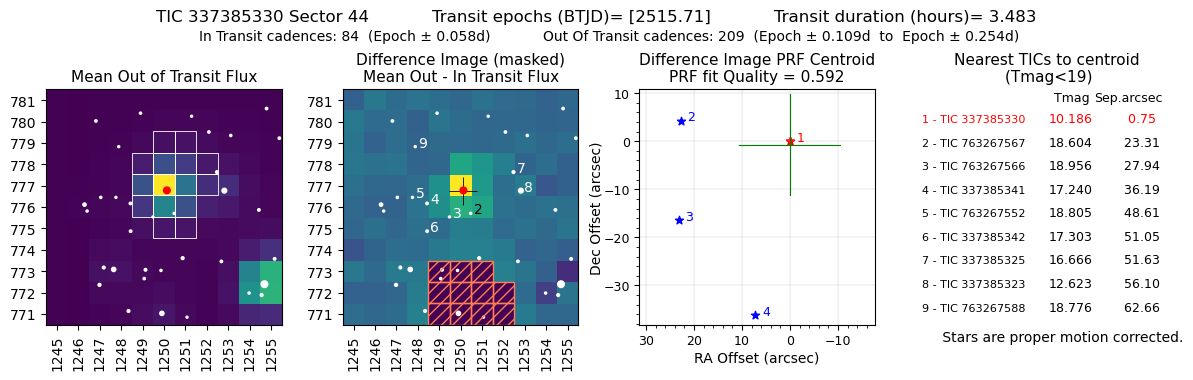

In [17]:
TIC_ID = 337385330
sector = 44
ttimes = [2515.71]
tot_dur = 3.483/24  
TICstr = 'TIC '+str(TIC_ID)
sres = lk.search_targetpixelfile(TICstr, sector=sector, mission='TESS', author='SPOC',exptime=120)
tpf = sres[0].download()

results = centroid_vetting(tpf, ttimes, tot_dur)
   
results = centroid_vetting(tpf, ttimes, tot_dur, mask_edges=True)

# custom mask
mask = np.full_like(tpf.flux.value[0], False, dtype=bool)
mask[0:2, 4:8] = True
mask[2, 4:7] = True
results = centroid_vetting(tpf, ttimes, tot_dur, mask=mask)

Brightest pixel on edge. Flux centroid couldn't be calculated. Use mask_edges=True or supply a mask if suitable.


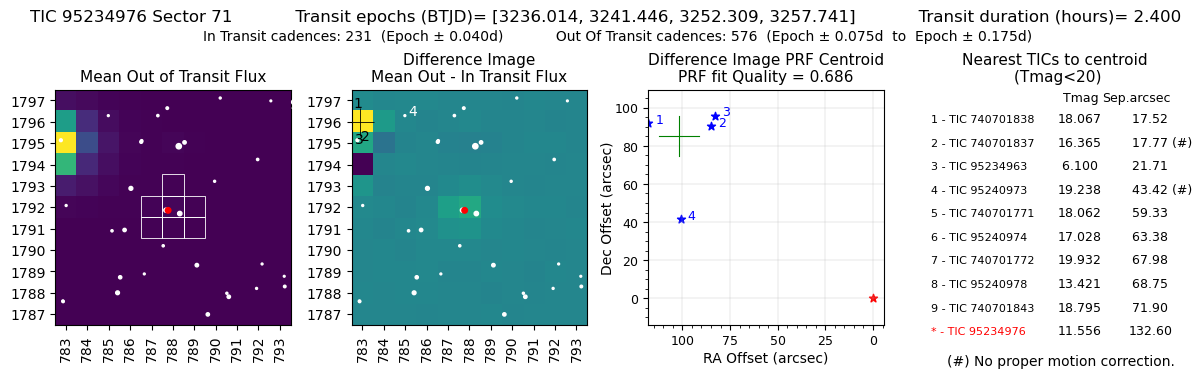

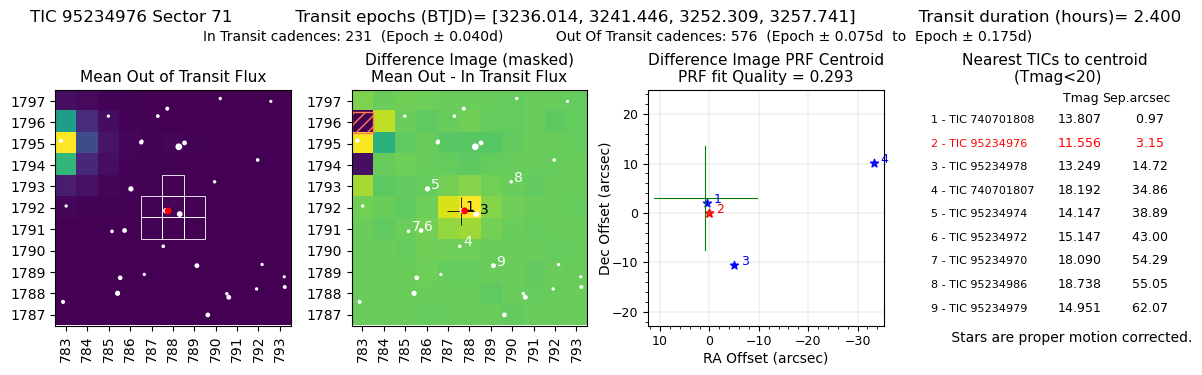

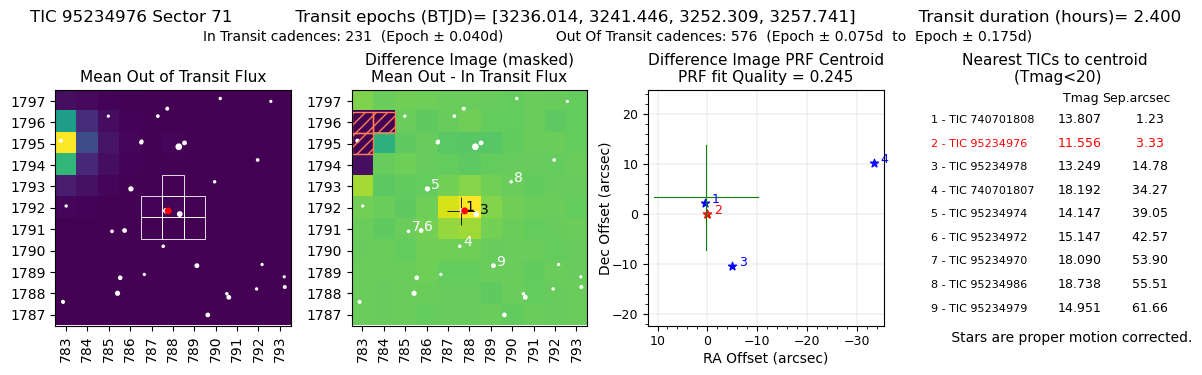

In [18]:
TIC_ID = 95234976
sector = 71
ttimes = [3236.014, 3241.446, 3252.309, 3257.741]
tot_dur = 0.1  
TICstr = 'TIC '+str(TIC_ID)
sres = lk.search_targetpixelfile(TICstr, sector=sector, mission='TESS', author='SPOC',exptime=120)
tpf = sres[0].download()

results = centroid_vetting(tpf, ttimes, tot_dur)
   
results = centroid_vetting(tpf, ttimes, tot_dur, mask_edges=True)

# custom mask
mask = np.full_like(tpf.flux.value[0], False, dtype=bool)
mask[8:10, 0] = True
mask[9, 1] = True
results = centroid_vetting(tpf, ttimes, tot_dur, mask=mask)